<a href="https://colab.research.google.com/github/DoraemonR/SoYul/blob/main/1%EC%9B%9426%EC%9D%BC_SGD_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


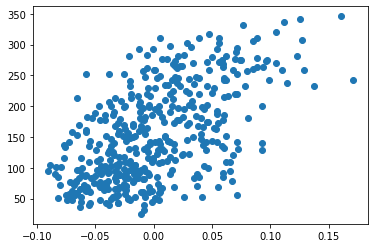

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.show()


In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

# 초기값 설정

w = 1.0
b = 1.0

print(x[0])

y_hat = x[0]*w + b # x[0]에 대한 y[0]의 예측값
print('y의 예측값:', y_hat)
print('y의 실제값:', y[0])

0.0616962065186885
y의 예측값: 1.0616962065186886
y의 실제값: 151.0


In [ ]:
# w의 값을 0.1씩 증가시키면서 y의 예측값의 변화량 살펴보기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print('y예측값 :', y_hat_inc)

y예측값 : 1.0678658271705574


In [ ]:
# w가 0.1만큼 증가했을 때 y_hat의 증가량을 계산

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print('w증가량:', w_rate)

w증가량: 0.061696206518688734


In [ ]:
# w(가중치) 업데이트

w_new = w + w_rate
print('w 업데이트 :', w_new)
print('1번째 행 데이터', x[0])

w 업데이트 : 1.0616962065186888
1번째 행 데이터 0.0616962065186885


In [ ]:
# b(절편) 업데이트

b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

b_new = b + 1
print(b_new)

1.1616962065186887
1.0
2.0


In [ ]:
# 오차를 이용한 w와 b 업데이트

err = y[0] - y_hat # 오차 = 실제값 - 예측값
print(err)

w_new = w + w_rate * err
b_new = b + 1 * err

print(w_new, b_new)

149.9383037934813
10.250624555904514 150.9383037934813


In [ ]:
# 두 번째 행 데이터를 이용하여 오차를 구하고 새로운 w와 b를 계산

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)


14.132317616381767 75.52764127612664


In [ ]:
# 전체 샘플 반복

for x_i, y_i in zip(x, y): # zip()함수 : 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줌.
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


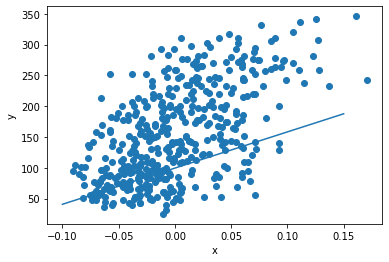

In [ ]:
# 그래프로 표현하기

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 더 나은 직선을 찾기 위해서 여러번 반복 (epoch=100)

for i in range(1,100):
  for x_i, y_i in zip(x, y): # zip()함수 : 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줌.
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


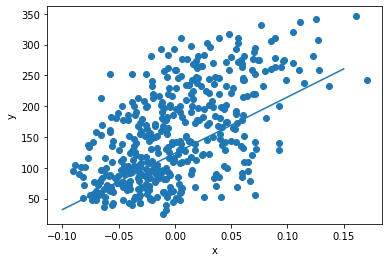

In [ ]:
# 그래프로 표현하기

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 데이터에 적합한 머신러닝 모델

### y_hat = 913.6x + 123.4 


In [ ]:
# 모델로 예측

x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


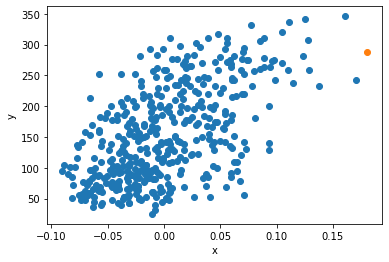

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 신경망으로 경사하강법 알고리즘 구현하기

In [23]:
class Neuron :

  def __init__(self):
    self.w = 1.0      # 가중치 초기화
    self.b = 1.0      # 절편 초기화

  def forpass(self, x) :
    y_hat = x * self.w + self.b   # 선형방정식 계산
    return y_hat
  
  def backprop(self, x, err) :
    w_grad = x * err              # 가중치에 대한 변화율 계산
    b_grad = 1 * err              # 절편에 대한 변화율 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs=100) : 
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)                 # 정방향계산
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)  # 역방향계산
        self.w -= w_grad                          # 새로운 가중치
        self.b -= b_grad


In [24]:
neuron = Neuron()
neuron.fit(x,y)

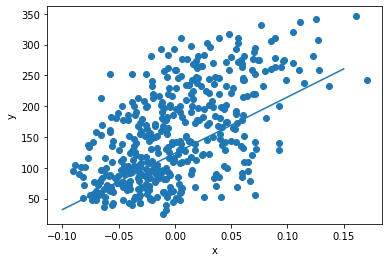

In [25]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()